# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hussein Mohamed Hussein Abdelbary

ID: 58-1328

Tutorial: 01

---

Name: Aly Ashraf Mohamed Lotfy

ID: 58-8572

Tutorial: 01

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,(Dokki50,Saturday,High,Low,1161m2,2022-04-21,27.85,3010.81 kWh
1096,BLD-2096-RH,Residential,NaN,Dokki-71,Sunday,Medium,Medium,37943m2,2024-10-31,36.23,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,_Mohandessin91,SunDay,Low,Medium,1558,2021-04-18,20.00,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,*23Smouha,saturday,Medium,Low,2145,2023-09-14,34.43,3348.39 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [5]:

Distinct_vals = df.nunique()
Distinct_vals = Distinct_vals.sort_values(ascending=False)
print(Distinct_vals)


Building_ID               1100
Energy_Consumption        1100
SquareFootage             1095
Neighborhood               848
Average_Temperature        796
Last_Maintenance_Date      727
Day_of_Week                 42
Governorate                  3
Building_Type                3
Appliances_Usage_Level       3
Occupancy_Level              3
dtype: int64


# Create a cross-tabulation
cross_tab = pd.crosstab(df['Building_Type'], df['Appliances_Usage_Level'])
print("Cross-tabulation of Building Type and Appliances Usage Level:")
print(cross_tab)

# Create a grouped bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Building Type vs. Appliances Usage Level')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
cross_tab = pd.crosstab(df['Building_Type'], df['Appliances_Usage_Level'])
print("Cross-tabulation of Building Type and Appliances Usage Level:")
print(cross_tab)

Cross-tabulation of Building Type and Appliances Usage Level:
Appliances_Usage_Level  High  Low  Medium
Building_Type                            
Commercial               112  105     108
Industrial               102  105     109
Residential              120  126     103


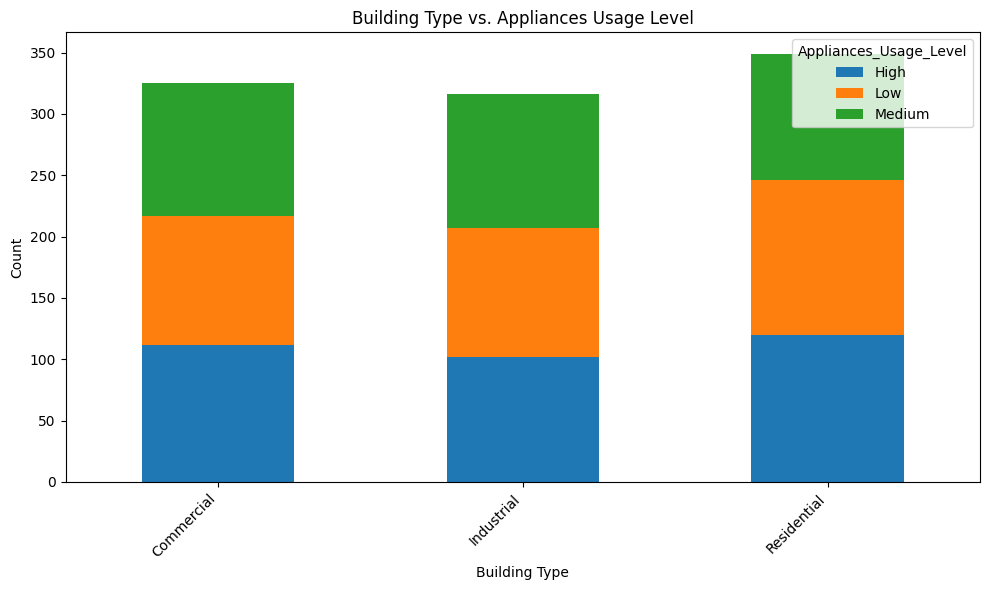

In [7]:
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Building Type vs. Appliances Usage Level')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [8]:
df.columns

Index(['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood',
       'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level',
       'SquareFootage', 'Last_Maintenance_Date', 'Average_Temperature',
       'Energy_Consumption'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'SquareFootage': 'SquareFootage(m2)',
    'Average_Temperature': 'Average_Temperature(Celsius)',
    'Energy_Consumption': 'Energy_Consumption(kwh)'
})
df.columns

Index(['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood',
       'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level',
       'SquareFootage(m2)', 'Last_Maintenance_Date',
       'Average_Temperature(Celsius)', 'Energy_Consumption(kwh)'],
      dtype='object')

In [10]:
df['Day_of_Week']= df['Day_of_Week'].str.capitalize()
df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage(m2),Last_Maintenance_Date,Average_Temperature(Celsius),Energy_Consumption(kwh)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,(Dokki50,Saturday,High,Low,1161m2,2022-04-21,27.85,3010.81 kWh
1096,BLD-2096-RH,Residential,NaN,Dokki-71,Sunday,Medium,Medium,37943m2,2024-10-31,36.23,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,_Mohandessin91,Sunday,Low,Medium,1558,2021-04-18,20.00,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,*23Smouha,Saturday,Medium,Low,2145,2023-09-14,34.43,3348.39 kWh


In [11]:

df['SquareFootage(m2)'] = df['SquareFootage(m2)'].astype(str).str.extract('([0-9,.]+)', expand=False).str.strip()
df['Energy_Consumption(kwh)'] = df['Energy_Consumption(kwh)'].astype(str).str.extract('([0-9,.]+)', expand=False).str.strip()
df['SquareFootage(m2)'] = pd.to_numeric(df['SquareFootage(m2)'], errors='coerce')
df['Energy_Consumption(kwh)'] = pd.to_numeric(df['Energy_Consumption(kwh)'], errors='coerce')
df[['SquareFootage(m2)', 'Energy_Consumption(kwh)']].head()


,SquareFootage(m2),Energy_Consumption(kwh)
0,7063,2713.95
1,44372,5744.99
2,19255,4101.24
3,13265,3009.14
4,13375,3279.17


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Building_ID                   1100 non-null   object 
 1   Building_Type                 990 non-null    object 
 2   Governorate                   873 non-null    object 
 3   Neighborhood                  1100 non-null   object 
 4   Day_of_Week                   1100 non-null   object 
 5   Occupancy_Level               1100 non-null   object 
 6   Appliances_Usage_Level        1100 non-null   object 
 7   SquareFootage(m2)             1100 non-null   int64  
 8   Last_Maintenance_Date         1100 non-null   object 
 9   Average_Temperature(Celsius)  990 non-null    float64
 10  Energy_Consumption(kwh)       1100 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 94.7+ KB


In [13]:

df['Neighborhood'] = df['Neighborhood'].astype(str).str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['Neighborhood'] = df['Neighborhood'].str.title()
df['Neighborhood'].unique()[:20]
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2276954711.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['Neighborhood'] = df['Neighborhood'].astype(str).str.extract('([a-zA-Z\s]+)', expand=False).str.strip()


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage(m2),Last_Maintenance_Date,Average_Temperature(Celsius),Energy_Consumption(kwh)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17


In [14]:

neigh_to_gov = (
    df.dropna(subset=['Governorate'])
      .groupby('Neighborhood')['Governorate']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
      .to_dict()
)
df['Governorate'] = df.apply(
    lambda row: neigh_to_gov[row['Neighborhood']] if pd.isna(row['Governorate']) and row['Neighborhood'] in neigh_to_gov else row['Governorate'],
    axis=1
)

global_mode = df['Governorate'].mode().iloc[0]
df['Governorate'] = df['Governorate'].fillna(global_mode)

print("Governorate nulls after mapping:", df['Governorate'].isnull().sum())
print(df[['Neighborhood','Governorate']].head(10))


Governorate nulls after mapping: 0
  Neighborhood Governorate
0       Smouha  Alexandria
1  Mohandessin        Giza
2    New Cairo       Cairo
3        Dokki        Giza
4       Smouha  Alexandria
5    New Cairo       Cairo
6   Heliopolis       Cairo
7    New Cairo       Cairo
8        Gleem  Alexandria
9  Mohandessin        Giza


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Building_ID                   1100 non-null   object 
 1   Building_Type                 990 non-null    object 
 2   Governorate                   1100 non-null   object 
 3   Neighborhood                  1100 non-null   object 
 4   Day_of_Week                   1100 non-null   object 
 5   Occupancy_Level               1100 non-null   object 
 6   Appliances_Usage_Level        1100 non-null   object 
 7   SquareFootage(m2)             1100 non-null   int64  
 8   Last_Maintenance_Date         1100 non-null   object 
 9   Average_Temperature(Celsius)  990 non-null    float64
 10  Energy_Consumption(kwh)       1100 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 94.7+ KB


In [16]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage(m2),Last_Maintenance_Date,Average_Temperature(Celsius),Energy_Consumption(kwh)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,Giza,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17


In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Building_ID                   1100 non-null   object 
 1   Building_Type                 990 non-null    object 
 2   Governorate                   1100 non-null   object 
 3   Neighborhood                  1100 non-null   object 
 4   Day_of_Week                   1100 non-null   object 
 5   Occupancy_Level               1100 non-null   object 
 6   Appliances_Usage_Level        1100 non-null   object 
 7   SquareFootage(m2)             1100 non-null   int64  
 8   Last_Maintenance_Date         1100 non-null   object 
 9   Average_Temperature(Celsius)  990 non-null    float64
 10  Energy_Consumption(kwh)       1100 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 94.7+ KB


In [18]:
from datetime import datetime

df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')
reference_date = df['Last_Maintenance_Date'].max()
df['Days_since_last_maintenance'] = (reference_date - df['Last_Maintenance_Date']).dt.days
display(df[['Last_Maintenance_Date', 'Days_since_last_maintenance']].head())
display(df.info())

,Last_Maintenance_Date,Days_since_last_maintenance
0,2020-01-01,1826
1,2022-02-24,1041
2,2021-02-22,1408
3,2023-07-30,520
4,2022-08-12,872


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Building_ID                   1100 non-null   object        
 1   Building_Type                 990 non-null    object        
 2   Governorate                   1100 non-null   object        
 3   Neighborhood                  1100 non-null   object        
 4   Day_of_Week                   1100 non-null   object        
 5   Occupancy_Level               1100 non-null   object        
 6   Appliances_Usage_Level        1100 non-null   object        
 7   SquareFootage(m2)             1100 non-null   int64         
 8   Last_Maintenance_Date         1100 non-null   datetime64[ns]
 9   Average_Temperature(Celsius)  990 non-null    float64       
 10  Energy_Consumption(kwh)       1100 non-null   float64       
 11  Days_since_last_maintenance   

None

In [19]:
def categorize_day(day):
    if day in ['Saturday', 'Friday']:
        return 'weekend'
    else:
        return 'weekday'
df['Day_type'] = df['Day_of_Week'].apply(categorize_day)

display(df[['Day_of_Week', 'Day_type']].head())
display(df.info())
# Assuming that we are in egypt and weekends are fridays and saturdays

,Day_of_Week,Day_type
0,Wednesday,weekday
1,Tuesday,weekday
2,Sunday,weekday
3,Tuesday,weekday
4,Monday,weekday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Building_ID                   1100 non-null   object        
 1   Building_Type                 990 non-null    object        
 2   Governorate                   1100 non-null   object        
 3   Neighborhood                  1100 non-null   object        
 4   Day_of_Week                   1100 non-null   object        
 5   Occupancy_Level               1100 non-null   object        
 6   Appliances_Usage_Level        1100 non-null   object        
 7   SquareFootage(m2)             1100 non-null   int64         
 8   Last_Maintenance_Date         1100 non-null   datetime64[ns]
 9   Average_Temperature(Celsius)  990 non-null    float64       
 10  Energy_Consumption(kwh)       1100 non-null   float64       
 11  Days_since_last_maintenance   

None

In [20]:

building_type_mode_by_gov = df.groupby('Governorate')['Building_Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

df['Building_Type'] = df.apply(
    lambda row: building_type_mode_by_gov[row['Governorate']] if pd.isna(row['Building_Type']) and row['Governorate'] in building_type_mode_by_gov else row['Building_Type'],
    axis=1
)
print("Building_Type nulls after imputation:", df['Building_Type'].isnull().sum())
display(df.info())

Building_Type nulls after imputation: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Building_ID                   1100 non-null   object        
 1   Building_Type                 1100 non-null   object        
 2   Governorate                   1100 non-null   object        
 3   Neighborhood                  1100 non-null   object        
 4   Day_of_Week                   1100 non-null   object        
 5   Occupancy_Level               1100 non-null   object        
 6   Appliances_Usage_Level        1100 non-null   object        
 7   SquareFootage(m2)             1100 non-null   int64         
 8   Last_Maintenance_Date         1100 non-null   datetime64[ns]
 9   Average_Temperature(Celsius)  990 non-null    float64       
 10  Energy_Consumption(kwh)       1100 non-null   float64   

None

In [21]:

mean_temperature = df['Average_Temperature(Celsius)'].mean()
df['Average_Temperature(Celsius)'] = df['Average_Temperature(Celsius)'].fillna(mean_temperature)
print("Average_Temperature(Celsius) nulls after imputation:", df['Average_Temperature(Celsius)'].isnull().sum())
display(df.info())

Average_Temperature(Celsius) nulls after imputation: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Building_ID                   1100 non-null   object        
 1   Building_Type                 1100 non-null   object        
 2   Governorate                   1100 non-null   object        
 3   Neighborhood                  1100 non-null   object        
 4   Day_of_Week                   1100 non-null   object        
 5   Occupancy_Level               1100 non-null   object        
 6   Appliances_Usage_Level        1100 non-null   object        
 7   SquareFootage(m2)             1100 non-null   int64         
 8   Last_Maintenance_Date         1100 non-null   datetime64[ns]
 9   Average_Temperature(Celsius)  1100 non-null   float64       
 10  Energy_Consumption(kwh)       1100 non-nu

None

In [22]:
df


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage(m2),Last_Maintenance_Date,Average_Temperature(Celsius),Energy_Consumption(kwh),Days_since_last_maintenance,Day_type
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.610000,2713.95,1826,weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,2022-02-24,33.499404,5744.99,1041,weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.880000,4101.24,1408,weekday
3,BLD-1003-HE,Industrial,Giza,Dokki,Tuesday,Low,High,13265,2023-07-30,35.060000,3009.14,520,weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17,872,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,1161,2022-04-21,27.850000,3010.81,985,weekend
1096,BLD-2096-RH,Residential,Giza,Dokki,Sunday,Medium,Medium,37943,2024-10-31,36.230000,4248.49,61,weekday
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,1558,2021-04-18,20.000000,2843.60,1353,weekday
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2145,2023-09-14,34.430000,3348.39,474,weekend


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

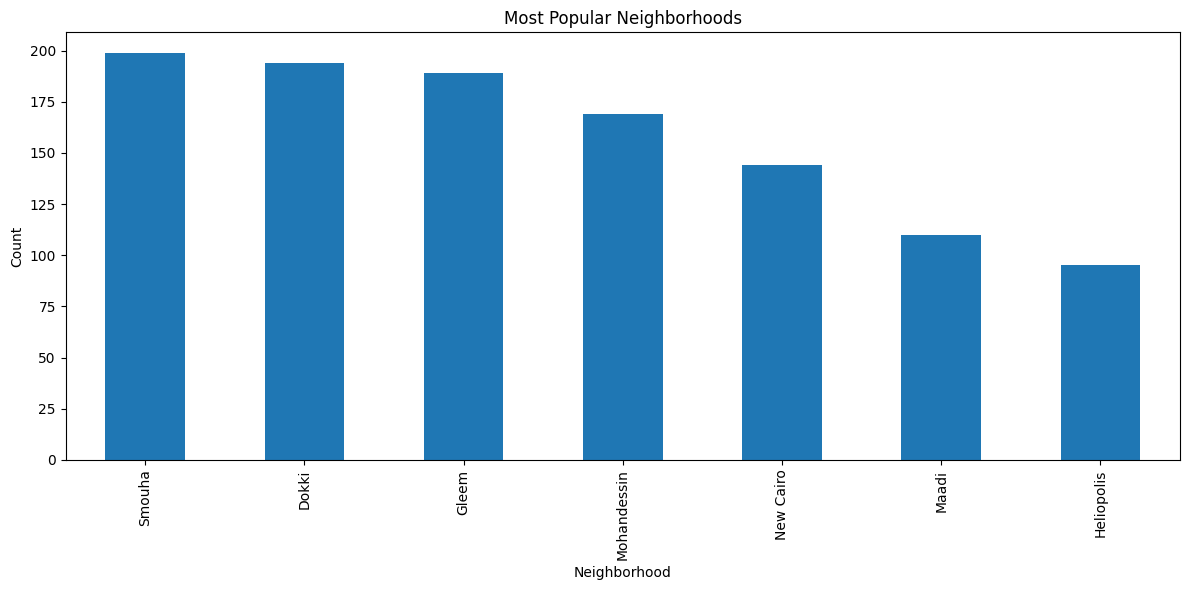

Top 3 most popular neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64


In [23]:

neighborhood_counts = df['Neighborhood'].value_counts()


plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Most Popular Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Top 3 most popular neighborhoods:")
print(neighborhood_counts.head(3))

**Answer for Q1:** We constructed a bar chart containing the count of residents in neighborhoods.Therefore, the top 3 neighborhoods as shown in the figure are Smouha(199), Dokki(194), Gleem(189)

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

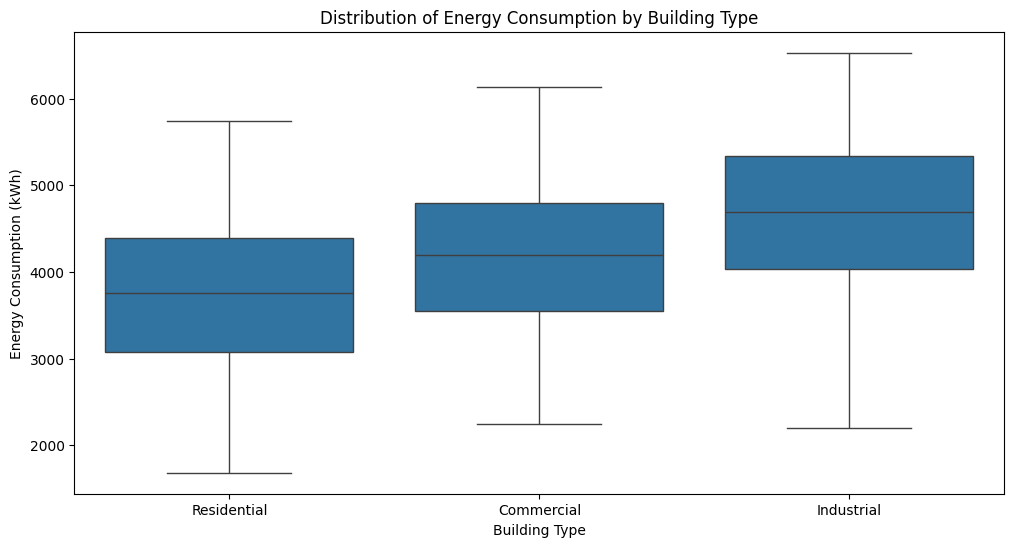

Standard deviation of energy consumption by building type:
Building_Type
Industrial     854.347158
Residential    853.121374
Commercial     820.555648
Name: Energy_Consumption(kwh), dtype: float64

Average energy consumption by building type:
Building_Type
Industrial     4653.811810
Commercial     4181.849917
Residential    3724.535510
Name: Energy_Consumption(kwh), dtype: float64


In [24]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Building_Type', y='Energy_Consumption(kwh)', data=df)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()
energy_std = df.groupby('Building_Type')['Energy_Consumption(kwh)'].std().sort_values(ascending=False)
print("Standard deviation of energy consumption by building type:")
print(energy_std)
energy_mean = df.groupby('Building_Type')['Energy_Consumption(kwh)'].mean().sort_values(ascending=False)
print("\nAverage energy consumption by building type:")
print(energy_mean)

Answer for Q2: Based on the box plot and the calculated standard deviations, the Residential building type has the widest distribution of energy consumption (std = 833.34), although all building types have similar standard deviations. On average, the Industrial building type has the highest energy consumption (mean = 4708.42 kWh).

**Q3:** How does the building size affect energy consumption?

**Visualization**

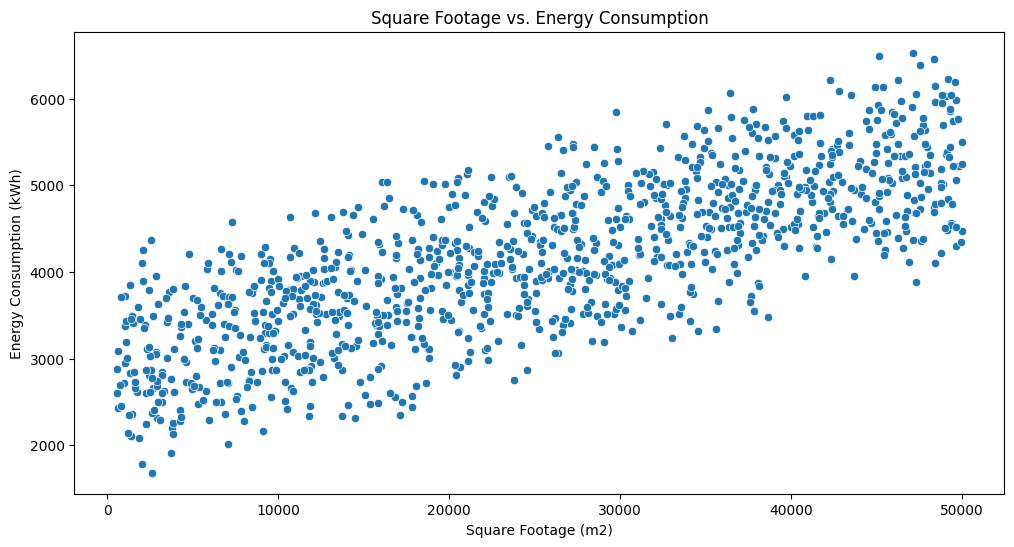


Correlation between Square Footage and Energy Consumption: 0.77


In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SquareFootage(m2)', y='Energy_Consumption(kwh)', data=df)
plt.title('Square Footage vs. Energy Consumption')
plt.xlabel('Square Footage (m2)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

correlation = df['SquareFootage(m2)'].corr(df['Energy_Consumption(kwh)'])
print(f"\nCorrelation between Square Footage and Energy Consumption: {correlation:.2f}")

**Answer for Q3:** As seen in the scatter diagram, there's a positive correlation between energy consumption and Square footage of a building (0.77), which makes sense considering that logically as the building is larger, it consumes more energy

> Add blockquote



**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

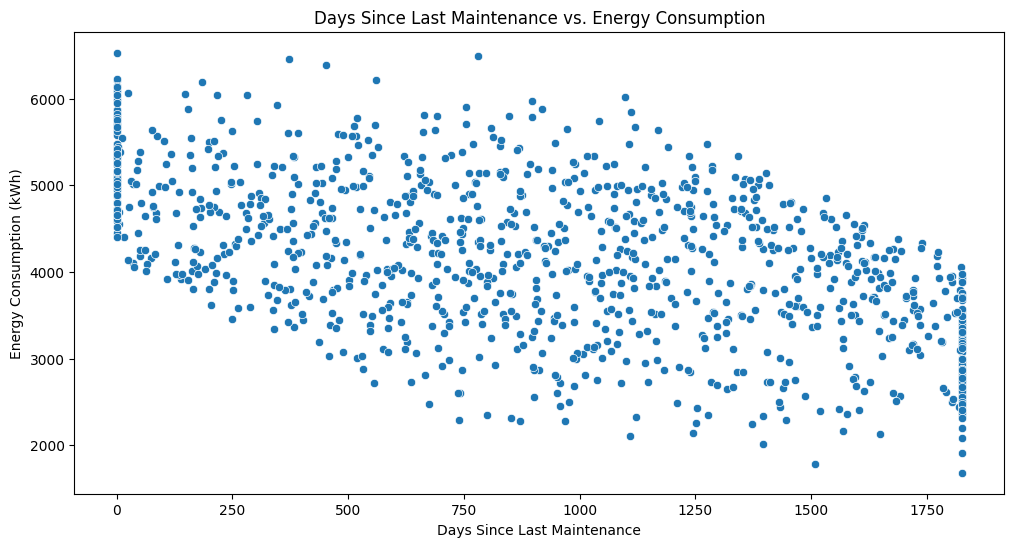

Correlation between Days Since Last Maintenance and Energy Consumption: -0.55


In [26]:
# Create a scatter plot to visualize the relationship between Days since last maintenance and Energy Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Days_since_last_maintenance', y='Energy_Consumption(kwh)', data=df)
plt.title('Days Since Last Maintenance vs. Energy Consumption')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Calculate the correlation coefficient
correlation_maintenance = df['Days_since_last_maintenance'].corr(df['Energy_Consumption(kwh)'])
print(f"Correlation between Days Since Last Maintenance and Energy Consumption: {correlation_maintenance:.2f}")

**Answer for Q4: As seen in the scatter diagram, Days since a building was last maintained negatively correlates with Energy consumption (-0.55), meaning that buildings with higher energy consumption requirements maintain their more often.


**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

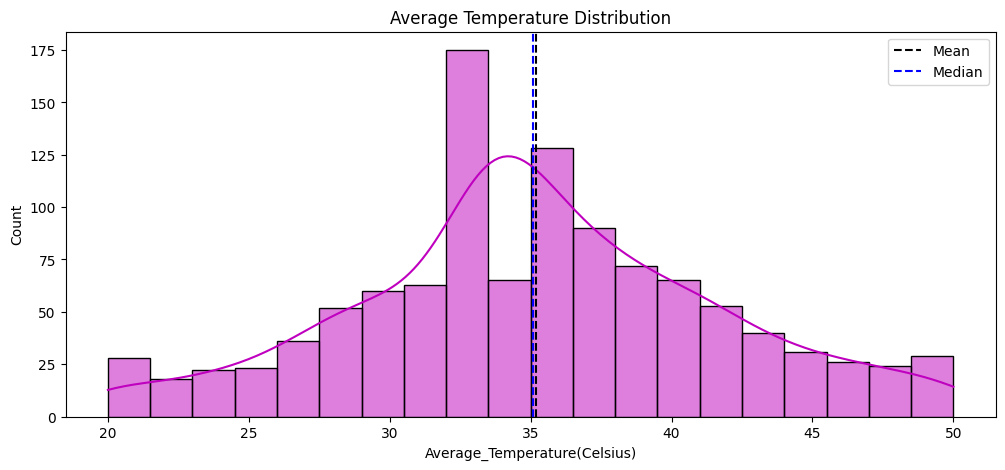

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Building_ID                   1100 non-null   object        
 1   Building_Type                 1100 non-null   object        
 2   Governorate                   1100 non-null   object        
 3   Neighborhood                  1100 non-null   object        
 4   Day_of_Week                   1100 non-null   object        
 5   Occupancy_Level               1100 non-null   object        
 6   Appliances_Usage_Level        1100 non-null   object        
 7   SquareFootage(m2)             1100 non-null   int64         
 8   Last_Maintenance_Date         1100 non-null   datetime64[ns]
 9   Average_Temperature(Celsius)  1100 non-null   float64       
 10  Energy_Consumption(kwh)       1100 non-null   float64       
 11  Days_since_last_maintenance   

In [27]:
# Check negative temperature values
df[df['Average_Temperature(Celsius)'] < 0]
df['Average_Temperature(Celsius)'].describe()
mean_temp = df['Average_Temperature(Celsius)'][df['Average_Temperature(Celsius)'] >= 0].mean()
df.loc[df['Average_Temperature(Celsius)'] < 0, 'Average_Temperature(Celsius)'] = mean_temp

plt.figure(figsize=(12,5))
plt.title('Average Temperature Distribution')

ax = sns.histplot(df['Average_Temperature(Celsius)'], color = 'm', kde=True)
ax.axvline(df['Average_Temperature(Celsius)'].mean(), color='k', linestyle='--', label='Mean');
ax.axvline(df['Average_Temperature(Celsius)'].median(), color='b', linestyle='--', label='Median');
plt.legend()
plt.show()

df.info()


**Answer for Q5:** Temperature was left skewed due to the presence of some outliers (values less that 0) we detected them and replaced them with the column mean so that our data is normally distributed

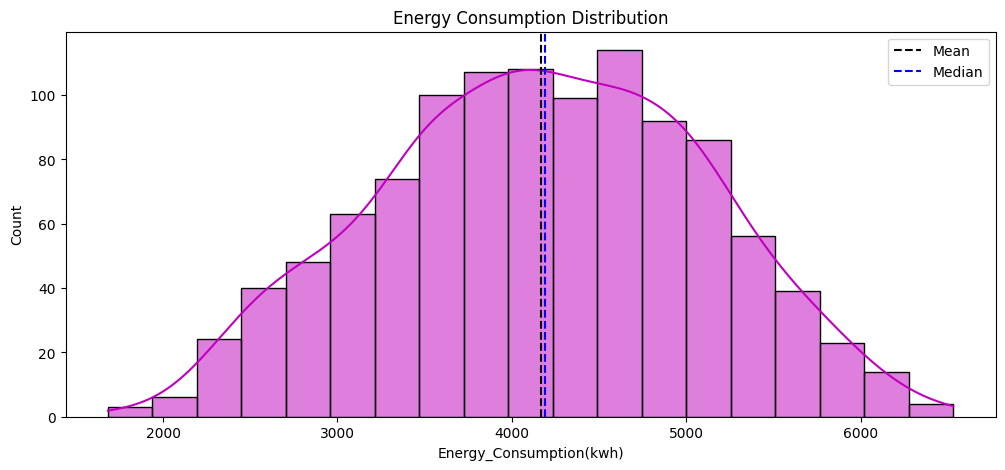

In [28]:
plt.figure(figsize=(12,5))
plt.title('Energy Consumption Distribution')

ax = sns.histplot(df['Energy_Consumption(kwh)'], color = 'm', kde=True)
ax.axvline(df['Energy_Consumption(kwh)'].mean(), color='k', linestyle='--', label='Mean');
ax.axvline(df['Energy_Consumption(kwh)'].median(), color='b', linestyle='--', label='Median');
plt.legend()
plt.show()

**Answer for Q5:** Energy consumption is normally distributed, giving us a sense of security and confidence in our data

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

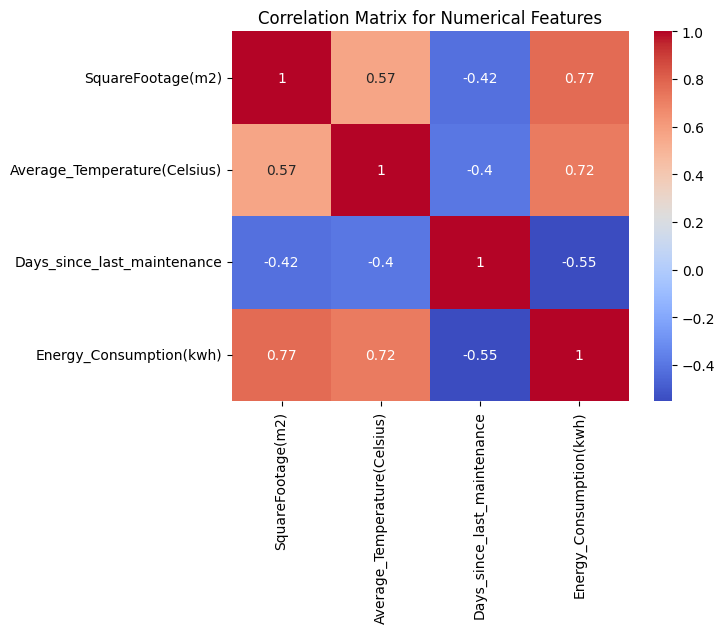

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['SquareFootage(m2)', 'Average_Temperature(Celsius)', 'Days_since_last_maintenance', 'Energy_Consumption(kwh)']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


**Answer for Q6:** Collinearity is when 2 or more independent variables are very highly correlated, giving us redundant information and making these columns not useful. Based on our correlation matrix, collinearity does not seem to be a problem in our dataset

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [30]:
# Drop the specified columns
columns_to_drop = ['Building_ID', 'Governorate', 'Neighborhood', 'Last_Maintenance_Date', 'Day_of_Week','']
df = df.drop(columns=columns_to_drop)

# Display the updated columns to verify
print("Columns after dropping:")
print(df.columns)

# Display the head of the dataframe to see the changes
display(df.head())
df.info()

Columns after dropping:
Index(['Building_Type', 'Occupancy_Level', 'Appliances_Usage_Level',
       'SquareFootage(m2)', 'Average_Temperature(Celsius)',
       'Energy_Consumption(kwh)', 'Days_since_last_maintenance', 'Day_type'],
      dtype='object')


,Building_Type,Occupancy_Level,Appliances_Usage_Level,SquareFootage(m2),Average_Temperature(Celsius),Energy_Consumption(kwh),Days_since_last_maintenance,Day_type
0,Residential,High,Low,7063,28.610000,2713.95,1826,weekday
1,Commercial,High,High,44372,33.499404,5744.99,1041,weekday
2,Industrial,Medium,Low,19255,37.880000,4101.24,1408,weekday
3,Industrial,Low,High,13265,35.060000,3009.14,520,weekday
4,Commercial,Low,Low,13375,28.820000,3279.17,872,weekday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Building_Type                 1100 non-null   object 
 1   Occupancy_Level               1100 non-null   object 
 2   Appliances_Usage_Level        1100 non-null   object 
 3   SquareFootage(m2)             1100 non-null   int64  
 4   Average_Temperature(Celsius)  1100 non-null   float64
 5   Energy_Consumption(kwh)       1100 non-null   float64
 6   Days_since_last_maintenance   1100 non-null   int64  
 7   Day_type                      1100 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 68.9+ KB


In [37]:
# List of categorical columns to encode
categorical_columns = ['Occupancy_Level', 'Appliances_Usage_Level', 'Day_type', 'Building_Type']

# Apply one-hot encoding
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,   # avoid dummy variable trap
                           dtype='int8')

# Compare before/after
print('Columns in original data frame:\n', df.columns.values)
print('\nNumber of rows and columns in the dataset:', df.shape)
print('\nColumns in data frame after encoding dummy variables:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the encoded dataset:', df_encode.shape)



df_encode

Columns in original data frame:
 ['Building_Type' 'Occupancy_Level' 'Appliances_Usage_Level'
 'SquareFootage(m2)' 'Average_Temperature(Celsius)'
 'Energy_Consumption(kwh)' 'Days_since_last_maintenance' 'Day_type']

Number of rows and columns in the dataset: (1100, 8)

Columns in data frame after encoding dummy variables:
 ['SquareFootage(m2)' 'Average_Temperature(Celsius)'
 'Energy_Consumption(kwh)' 'Days_since_last_maintenance'
 'Occupancy_Level_Low' 'Occupancy_Level_Medium'
 'Appliances_Usage_Level_Low' 'Appliances_Usage_Level_Medium'
 'Day_type_weekend' 'Building_Type_Industrial' 'Building_Type_Residential']

Number of rows and columns in the encoded dataset: (1100, 11)


,SquareFootage(m2),Average_Temperature(Celsius),Energy_Consumption(kwh),Days_since_last_maintenance,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Day_type_weekend,Building_Type_Industrial,Building_Type_Residential
0,7063,28.610000,2713.95,1826,0,0,1,0,0,0,1
1,44372,33.499404,5744.99,1041,0,0,0,0,0,0,0
2,19255,37.880000,4101.24,1408,0,1,1,0,0,1,0
3,13265,35.060000,3009.14,520,1,0,0,0,0,1,0
4,13375,28.820000,3279.17,872,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,1161,27.850000,3010.81,985,0,0,1,0,1,0,0
1096,37943,36.230000,4248.49,61,0,1,0,1,0,0,1
1097,1558,20.000000,2843.60,1353,1,0,0,1,0,0,0
1098,2145,34.430000,3348.39,474,0,1,1,0,1,1,0


In [32]:
# Select the columns of interest
attributes_of_interest = ['Energy_Consumption(kwh)', 'SquareFootage(m2)', 'Average_Temperature(Celsius)', 'Days_since_last_maintenance']

# Get the minimum values for the selected attributes
min_values = df[attributes_of_interest].min()

# Get the maximum values for the selected attributes
max_values = df[attributes_of_interest].max()

print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)

Minimum values:
Energy_Consumption(kwh)         1683.95
SquareFootage(m2)                560.00
Average_Temperature(Celsius)      20.00
Days_since_last_maintenance        0.00
dtype: float64

Maximum values:
Energy_Consumption(kwh)          6530.6
SquareFootage(m2)               49997.0
Average_Temperature(Celsius)       50.0
Days_since_last_maintenance      1826.0
dtype: float64


In [33]:
# List of numerical columns to normalize
numerical_columns_to_normalize = ['Energy_Consumption(kwh)', 'SquareFootage(m2)', 'Average_Temperature(Celsius)', 'Days_since_last_maintenance']

df_encode[numerical_columns_to_normalize] = (
    df_encode[numerical_columns_to_normalize] - df_encode[numerical_columns_to_normalize].min()
) / (
    df_encode[numerical_columns_to_normalize].max() - df_encode[numerical_columns_to_normalize].min()
)

# Display the head of the encoded and normalized dataframe to see the changes
print("DataFrame after Min-Max Normalization:")
display(df_encode.head())

DataFrame after Min-Max Normalization:


,Building_Type,SquareFootage(m2),Average_Temperature(Celsius),Energy_Consumption(kwh),Days_since_last_maintenance,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Day_type_weekend
0,Residential,0.131541,0.28700,0.212518,1.000000,0,0,1,0,0
1,Commercial,0.886219,0.44998,0.837907,0.570099,0,0,0,0,0
2,Industrial,0.378158,0.59600,0.498755,0.771084,0,1,1,0,0
3,Industrial,0.256994,0.50200,0.273424,0.284775,1,0,0,0,0
4,Commercial,0.259219,0.29400,0.329139,0.477547,1,0,1,0,0


## Modelling

_Apply the linear regression model below._

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Define features (X) and target (y)
# Exclude 'Energy_Consumption(kwh)' which is the target variable
X = df_encode.drop('Energy_Consumption(kwh)', axis=1)
y = df_encode['Energy_Consumption(kwh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

Evaluate the model you applied.

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 42885.30
Root Mean Squared Error (RMSE): 207.09
Mean Absolute Error (MAE): 151.83
R-squared (R2): 0.95




> Add blockquote



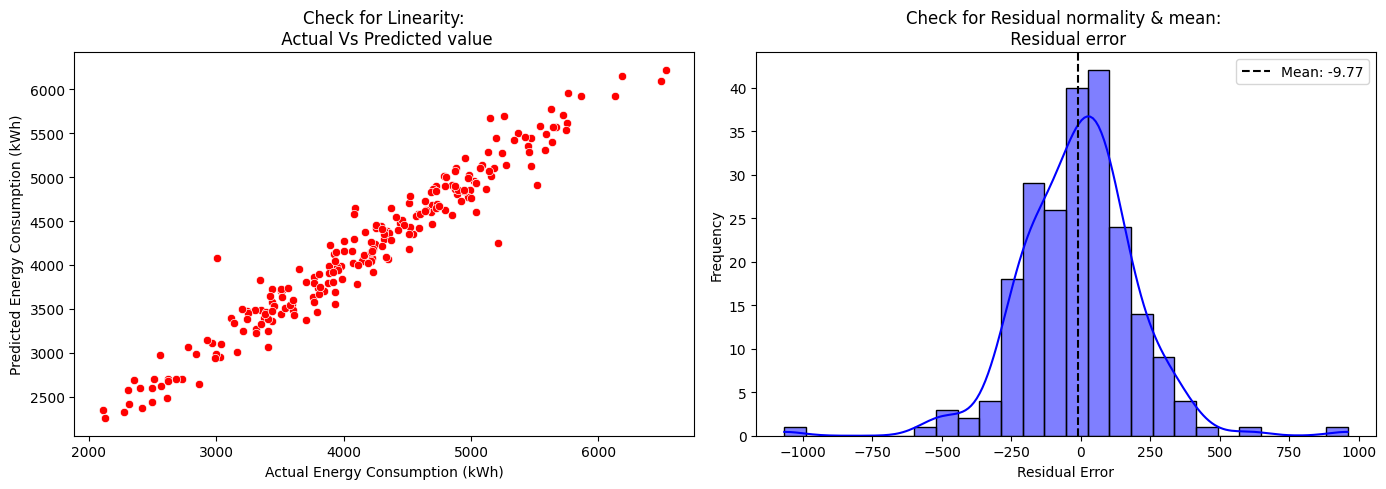

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
ax.set_xlabel("Actual Energy Consumption (kWh)")
ax.set_ylabel("Predicted Energy Consumption (kWh)")


# Checking for residual normality & mean
ax = f.add_subplot(122)
residuals = y_test - y_pred
sns.histplot(x=residuals, ax=ax, color='b', kde=True)
ax.axvline(residuals.mean(), color='k', linestyle='--', label=f'Mean: {residuals.mean():.2f}')
ax.set_title('Check for Residual normality & mean: \n Residual error')
ax.set_xlabel("Residual Error")
ax.set_ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: The linear regression model shows very promising results, with an R2 value of 0.95 (meaning that 95% of all variance in the results could be explained by the model) and relatively low RMSE,MSE and MAE.This suggest that the model's predictive capabilities are strong and dependable. The scatter diagram shows good correlation between the predicted values vs the actual ones, and the histogram with the distribution of residual errors vs frequency shows a normal distribution which is a good sign. However, as seen in the scatter diagram there might be some deviation and a bit of outlying data, which is what needs to be worked on. Based on the results, i would definitely recommend using this linear regression model for an energy company, as it is backed by the results, but i would recommend either putting in more variables that could increase the accuracy of the model, or try other regression techniques to see if they can provide more insights or improve performance
